# BPM and Energy: The DNA of Hit Songs

## Analysis Goals
Discover how tempo (BPM) and energy levels interact to create successful songs:

1. **Energy-BPM Relationships**
   - How do energy and tempo work together?
   - What combinations are most successful?

2. **Success Patterns**
   - High-Energy + High-BPM (Dance/Club)
   - High-Energy + Low-BPM (Power Ballads)
   - Low-Energy + High-BPM (Electronic/Ambient)
   - Low-Energy + Low-BPM (Acoustic/Chill)

3. **Genre-Specific Patterns**
   - What works in different genres?
   - Genre-specific sweet spots

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8')  # or any other valid style like 'seaborn-darkgrid'
plt.rcParams['figure.figsize'] = [12, 6]

## 1. Data Loading and Initial Analysis

Songs in each BPM-Energy quadrant:
quadrant
High BPM, High Energy    6154
Low BPM, Low Energy      6126
Low BPM, High Energy     4473
High BPM, Low Energy     4446
Name: count, dtype: int64


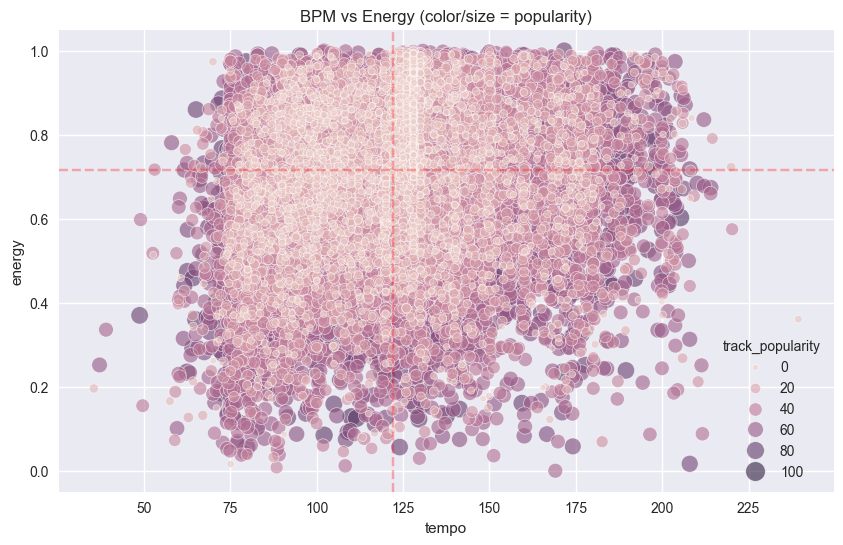

In [4]:
# Load data
sheet_url = "https://docs.google.com/spreadsheets/d/1ae96nZRL_kJWb_EEv2avxMOgGClvyc77SpY-VBqVGiY/edit#gid=1052928543"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

# Create BPM-Energy quadrants
bpm_median = df['tempo'].median()
energy_median = df['energy'].median()

def get_quadrant(row):
    if row['tempo'] >= bpm_median and row['energy'] >= energy_median:
        return 'High BPM, High Energy'
    elif row['tempo'] >= bpm_median and row['energy'] < energy_median:
        return 'High BPM, Low Energy'
    elif row['tempo'] < bpm_median and row['energy'] >= energy_median:
        return 'Low BPM, High Energy'
    else:
        return 'Low BPM, Low Energy'

df['quadrant'] = df.apply(get_quadrant, axis=1)

# Display distribution
print("Songs in each BPM-Energy quadrant:")
print(df['quadrant'].value_counts())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo', y='energy', 
                hue='track_popularity', size='track_popularity',
                sizes=(20, 200), alpha=0.6)
plt.axvline(bpm_median, color='red', linestyle='--', alpha=0.3)
plt.axhline(energy_median, color='red', linestyle='--', alpha=0.3)
plt.title('BPM vs Energy (color/size = popularity)')
plt.show()

## 2. Success Analysis by Quadrant

Popularity Statistics by Quadrant:
                      track_popularity             
                                  mean    std count
quadrant                                           
High BPM, High Energy            42.85  20.30  6154
High BPM, Low Energy             47.10  20.61  4446
Low BPM, High Energy             45.82  20.40  4473
Low BPM, Low Energy              46.35  20.61  6126


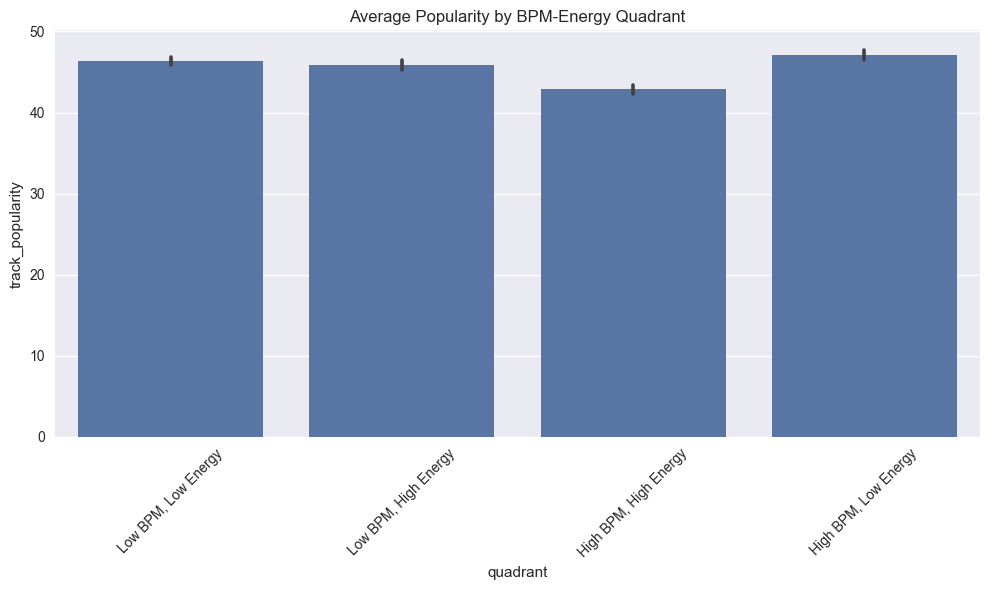


ANOVA Test Results:
F-statistic: 47.043
p-value: 0.000


In [5]:
# Calculate average popularity by quadrant
quadrant_stats = df.groupby('quadrant').agg({
    'track_popularity': ['mean', 'std', 'count']
}).round(2)

print("Popularity Statistics by Quadrant:")
print(quadrant_stats)

# Plot average popularity by quadrant
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='quadrant', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Average Popularity by BPM-Energy Quadrant')
plt.tight_layout()
plt.show()

# Perform ANOVA test
quadrants = df['quadrant'].unique()
popularity_by_quadrant = [df[df['quadrant'] == q]['track_popularity'] for q in quadrants]
f_stat, p_value = stats.f_oneway(*popularity_by_quadrant)

print(f"\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")

## 3. Genre-Specific Patterns

Success Patterns by Genre and Quadrant:
                                       mean  count
playlist_genre quadrant                           
edm            High BPM, High Energy  35.66   2270
               High BPM, Low Energy   33.73    459
               Low BPM, High Energy   39.54    379
               Low BPM, Low Energy    37.58    309
latin          High BPM, High Energy  45.58    660
               High BPM, Low Energy   47.55    560
               Low BPM, High Energy   47.40   1026
               Low BPM, Low Energy    46.95    953
pop            High BPM, High Energy  50.95   1091
               High BPM, Low Energy   53.29    732
               Low BPM, High Energy   52.10    917
               Low BPM, Low Energy    51.27   1128
r&b            High BPM, High Energy  42.33    222
               High BPM, Low Energy   44.94    850
               Low BPM, High Energy   38.74    590
               Low BPM, Low Energy    42.46   1574
rap            High BPM, High Energy  45.5

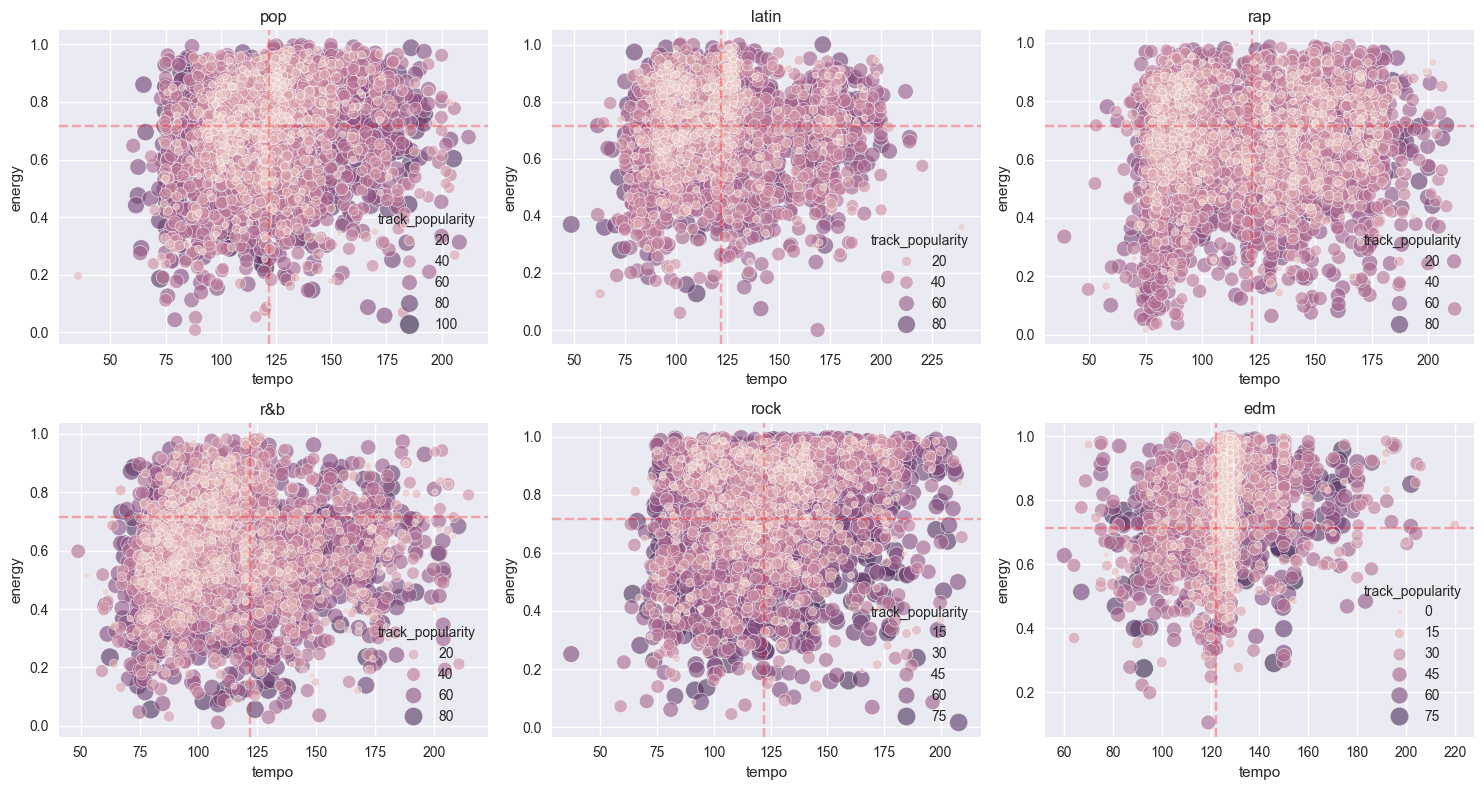

In [6]:
# Analyze quadrant success by genre
genre_quadrant_stats = df.groupby(['playlist_genre', 'quadrant'])['track_popularity'].agg([
    'mean', 'count'
]).round(2)

print("Success Patterns by Genre and Quadrant:")
print(genre_quadrant_stats)

# Plot genre-specific patterns
plt.figure(figsize=(15, 8))
for i, genre in enumerate(df['playlist_genre'].unique(), 1):
    plt.subplot(2, 3, i)
    genre_data = df[df['playlist_genre'] == genre]
    sns.scatterplot(data=genre_data, x='tempo', y='energy',
                    hue='track_popularity', size='track_popularity',
                    sizes=(20, 200), alpha=0.6)
    plt.axvline(bpm_median, color='red', linestyle='--', alpha=0.3)
    plt.axhline(energy_median, color='red', linestyle='--', alpha=0.3)
    plt.title(genre)
plt.tight_layout()
plt.show()

## 4. Sweet Spot Analysis

In [ ]:
# Create BPM and Energy bins
bpm_bins = pd.qcut(df['tempo'], q=5)
energy_bins = pd.qcut(df['energy'], q=5)

# Calculate average popularity for each combination
popularity_matrix = df.groupby([bpm_bins, energy_bins])['track_popularity'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(popularity_matrix, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Popularity Heatmap: BPM vs Energy')
plt.xlabel('Energy Quintile')
plt.ylabel('BPM Quintile')
plt.show()

# Find sweet spots
top_combinations = df.groupby([bpm_bins, energy_bins])['track_popularity'].agg([
    'mean', 'count'
]).round(2).sort_values('mean', ascending=False)

print("\nTop BPM-Energy Combinations:")
print(top_combinations.head())

## 5. Hit Song Formula

In [ ]:
# Define hit threshold (top 10%)
hit_threshold = df['track_popularity'].quantile(0.9)
hits = df[df['track_popularity'] >= hit_threshold]

# Analyze hit song characteristics by quadrant
hit_quadrant_stats = hits.groupby('quadrant').agg({
    'tempo': ['mean', 'std'],
    'energy': ['mean', 'std'],
    'track_popularity': ['mean', 'count']
}).round(2)

print("Hit Song Characteristics by Quadrant:")
print(hit_quadrant_stats)

# Plot hit song distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=hits, x='tempo', y='energy', 
            cmap='viridis', fill=True)
plt.title('Hit Song Distribution in BPM-Energy Space')
plt.axvline(bpm_median, color='red', linestyle='--', alpha=0.3)
plt.axhline(energy_median, color='red', linestyle='--', alpha=0.3)
plt.show()

# Print hit song formulas
print("\nHit Song Formulas:")
for quadrant in hit_quadrant_stats.index:
    stats = hit_quadrant_stats.loc[quadrant]
    print(f"\n{quadrant}:")
    print(f"BPM: {stats[('tempo', 'mean')]:.0f} ± {stats[('tempo', 'std')]:.0f}")
    print(f"Energy: {stats[('energy', 'mean')]:.2f} ± {stats[('energy', 'std')]:.2f}")
    print(f"Average Popularity: {stats[('track_popularity', 'mean')]:.1f}")
    print(f"Number of Hits: {stats[('track_popularity', 'count')]:.0f}")